In [62]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from sklearn import datasets

In [3]:
iris=datasets.load_iris()

In [4]:
X=iris.data
Y=iris.target

In [5]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
from sklearn.svm import SVC

In [7]:
model=SVC()

In [11]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.4,random_state=3)

In [26]:
model.fit(X_train,Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [27]:
from sklearn import metrics

In [28]:
predicted=model.predict(X_test)
expected=Y_test

In [29]:
metrics.accuracy_score(expected,predicted)

0.95

In [30]:
from sklearn import svm

In [31]:
X=iris.data[:,:2]
Y=iris.target

In [32]:
C=1.0

In [34]:
svc=svm.SVC(kernel='linear',C=C).fit(X,Y)

In [41]:
rbf_svc=svm.SVC(kernel='rbf',gamma=0.7,C=C).fit(X,Y)

In [42]:
poly_svc=svm.SVC(kernel='poly',degree=3,C=C).fit(X,Y)

In [43]:
lin_svc=svm.LinearSVC(C=C).fit(X,Y)

C:\Users\Dimpu\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [47]:
h=0.02

x_min=X[:,0].min()-1
x_max=X[:,0].max()+1

In [50]:
y_min=X[:,1].min()-1
y_max=X[:,1].max()+1

In [51]:
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

In [52]:
titles=['SVC with linear kernel','LinearSVC (linear kernel)','SVC with RBF kernel','SVC with ploynomial kernel']

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rfc=RandomForestClassifier(n_estimators=200)

In [58]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [59]:
rfc_pred=rfc.predict(X_test)

In [60]:
rfc_cm=confusion_matrix(Y_test,rfc_pred)
rfc_cm

array([[22,  0,  0],
       [ 0, 18,  2],
       [ 0,  0, 18]], dtype=int64)

Text(69,0.5,'Truth')

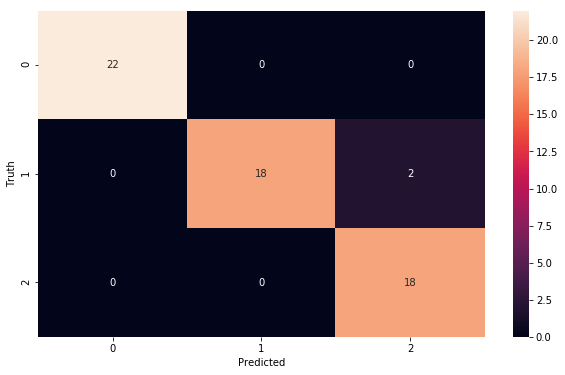

In [63]:
plt.figure(figsize = (10,6))
sns.heatmap(rfc_cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [65]:
print(accuracy_score(Y_test,rfc_pred))

0.9666666666666667


In [66]:
print(classification_report(Y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      0.90      0.95        20
           2       0.90      1.00      0.95        18

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.96        60
weighted avg       0.97      0.97      0.97        60

